In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics.cluster import adjusted_rand_score

mpl.rcParams['figure.dpi']= 500
sns.set_context("notebook")
sns.set(style="white")

In [2]:
cellvgae_umap = np.load('CellVGAE/cellvgae_umap.npy')
cellvgae_clusters = np.load('CellVGAE/cellvgae_clusters.npy')
cellvgae_clusters_merged = np.load('CellVGAE/cellvgae_clusters_merge.npy')

In [3]:
sam_umap = np.load('SAM/sam_umap.npy')
sam_df = pd.read_csv('SAM/sam_clusters.csv')
sam_clusters = sam_df['clusters'].values

In [4]:
diffvae_umap = np.load('DiffVAE/diffvae_umap.npy')

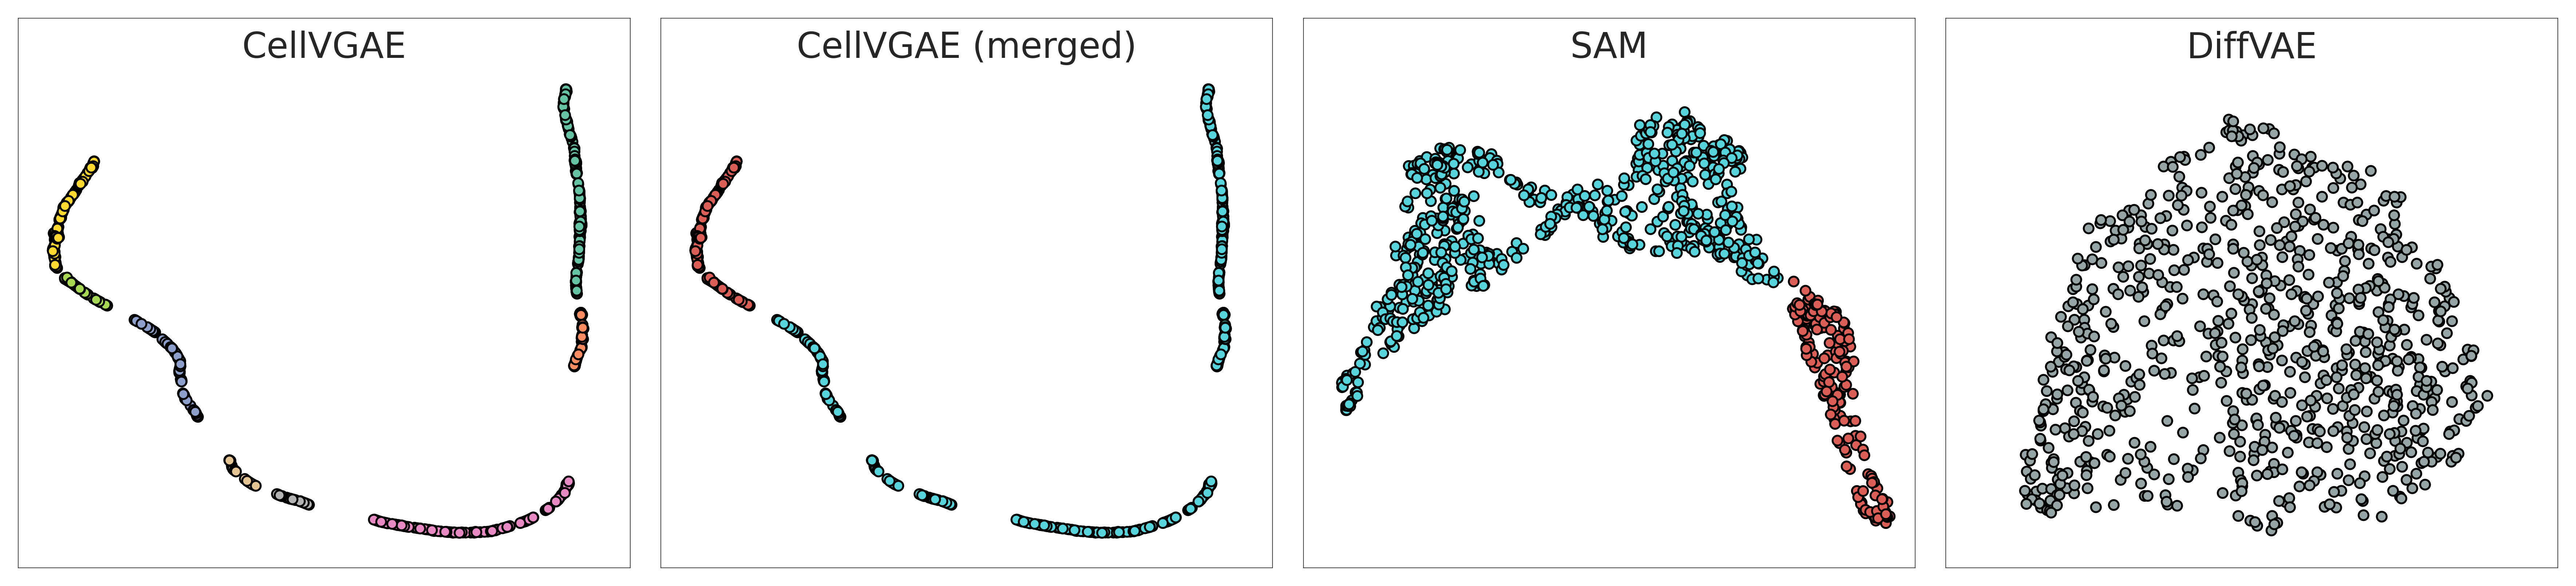

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))
# plt.tight_layout(w_pad=1.5, h_pad=3.5)
sns.scatterplot(x=cellvgae_umap[:, 0], y=cellvgae_umap[:, 1], hue=cellvgae_clusters, palette=sns.color_palette("Set2", len(set(cellvgae_clusters))), s=15, edgecolor='black', linewidth=0.75, ax=ax1)
sns.scatterplot(x=cellvgae_umap[:, 0], y=cellvgae_umap[:, 1], hue=cellvgae_clusters_merged, palette=sns.color_palette("hls", len(set(cellvgae_clusters_merged))), s=15, edgecolor='black', linewidth=0.75, ax=ax2)
sns.scatterplot(x=sam_umap[:, 0], y=sam_umap[:, 1], hue=sam_clusters, palette=sns.color_palette("hls", len(set(sam_clusters))), s=15, edgecolor='black', linewidth=0.75, ax=ax3)
sns.scatterplot(x=diffvae_umap[:, 0], y=diffvae_umap[:, 1], color='#95a5a6', s=15, edgecolor='black', linewidth=0.75, ax=ax4)

for ax in (ax1, ax2, ax3, ax4):
    ax.spines['left'].set_linewidth(0.25)
    ax.spines['top'].set_linewidth(0.25)
    ax.spines['bottom'].set_linewidth(0.25)
    ax.spines['right'].set_linewidth(0.25)

# Setting the values for all axes.
plt.setp(ax1, xlim=(-12, 18), ylim=(-15, 30))
plt.setp(ax2, xlim=(-12, 18), ylim=(-15, 30))
plt.setp(ax3, xlim=(-3, 14), ylim=(7, 16.5))
plt.setp(ax4, xlim=(3, 11.5), ylim=(5, 11.5))

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.get_legend().remove()
ax1.set_title("CellVGAE", position=(0.5, 0.9), fontdict={'fontsize': 14})

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.get_legend().remove()
ax2.set_title("CellVGAE (merged)", position=(0.5, 0.9), fontdict={'fontsize': 14})

ax3.get_legend().remove()
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.set_title("SAM", position=(0.5, 0.9), fontdict={'fontsize': 14})

ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax4.set_title("DiffVAE", position=(0.5, 0.9), fontdict={'fontsize': 14})

plt.subplots_adjust(wspace=0.05, hspace=0.05)
# plt.savefig('macrophaes_plots.pdf', dpi=500, bbox_inches='tight')

In [6]:
def overlap_percent(vgae_list, sam_list):
    common = len([x for x in vgae_list if x in sam_list])
    return common, common / len(sam_list)

In [7]:
sam_cl0 = sam_df.iloc[sam_clusters == 0]['Unnamed: 0'].values
sam_cl1 = sam_df.iloc[sam_clusters == 1]['Unnamed: 0'].values

In [8]:
cell_cl0 = sam_df.loc[cellvgae_clusters_merged == 5]['Unnamed: 0'].values
cell_cl1 = sam_df.loc[cellvgae_clusters_merged == 7]['Unnamed: 0'].values

In [11]:
adjusted_rand_score(sam_clusters, cellvgae_clusters_merged)

0.7604700880220778

In [9]:
overlap_percent(cell_cl0, sam_cl0)

(167, 0.912568306010929)

In [10]:
overlap_percent(cell_cl1, sam_cl1)

(608, 0.95)

In [13]:
len(sam_cl0)

183

In [14]:
len(sam_cl1)

640